### imports

In [1]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc

# Load and make data frames

In [2]:
df_bike_accidents = pd.read_pickle('data_frames/df_bike_accidents.pkl')
df_not_bike_accidents = pd.read_pickle('data_frames/df_not_bike_accidents.pkl')
df_rides = pd.read_pickle('data_frames/df_rides.pkl')

In [3]:
df_bike_accidents.insert(df_bike_accidents.shape[1], 'bike_accident', [1 for i in range(df_bike_accidents.shape[0])])

In [4]:
df_not_bike_accidents.insert(df_not_bike_accidents.shape[1], 'bike_accident', [0 for i in range(df_not_bike_accidents.shape[0])])

In [5]:
df_all_accidents = pd.concat([df_bike_accidents, df_not_bike_accidents])

In [6]:
df_all_accidents = pd.DataFrame({'hour': df_all_accidents['date_time'].dt.hour,\
              'day_of_week': df_all_accidents['date_time'].dt.day_of_week,\
              'day_of_year': df_all_accidents['date_time'].dt.day_of_year,\
              'month': df_all_accidents['date_time'].dt.month,\
              'leap_year': df_all_accidents['date_time'].dt.is_leap_year.astype(int),\
              'lat': df_all_accidents['lat'],\
              'lng': df_all_accidents['lng'],\
              'bike_accident': df_all_accidents['bike_accident']})

# Balanced Random Forest

In [7]:
X, y = df_all_accidents.drop('bike_accident', axis=1), df_all_accidents['bike_accident']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## take 1

In [9]:
brfc = BalancedRandomForestClassifier(random_state=1)
parameters = {'n_estimators': [100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'bootstrap': [True, False]}
grid_brfc = GridSearchCV(brfc, parameters, scoring = 'f1')
grid_brfc.fit(X_train, y_train)

GridSearchCV(estimator=BalancedRandomForestClassifier(random_state=1),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [10]:
y_pred = grid_brfc.best_estimator_.predict(X_test)

accuracy: 0.7339814923275155
f1: 0.1961061946902655
precision: 0.12386115924207702
recall: 0.47058823529411764


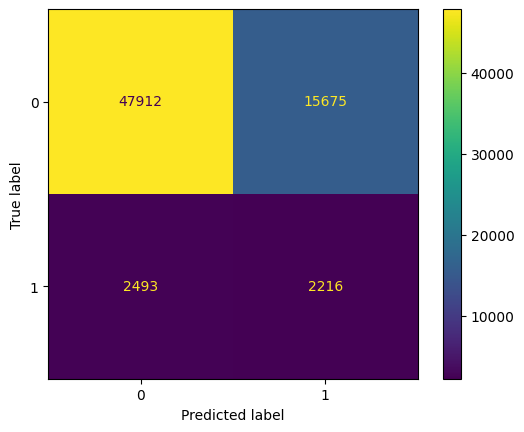

In [11]:
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

## take 2

In [12]:
print(parameters)
print(grid_brfc.best_params_)

{'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}
{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [13]:
brfc_2 = BalancedRandomForestClassifier(random_state=1, min_samples_leaf = 1, min_samples_split = 2, bootstrap = False)
parameters_2 = {'n_estimators': [190, 200, 210, 300],
              'max_depth': [19, 20, 21, 30],
              'min_samples_leaf': [2, 3],
              'min_samples_split': [4, 5, 6]}
grid_brfc_2 = GridSearchCV(brfc_2, parameters_2, scoring = 'f1')
grid_brfc_2.fit(X_train, y_train)

GridSearchCV(estimator=BalancedRandomForestClassifier(random_state=1),
             param_grid={'max_depth': [19, 20, 21, 30],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [190, 200, 210, 300]},
             scoring='f1')

In [14]:
print(grid_brfc_2.best_params_)
print(grid_brfc_2.best_score_)

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 300}
0.1936070459120548


In [15]:
y_pred_2 = grid_brfc_2.best_estimator_.predict(X_test)

accuracy: 0.7334836593651165
f1: 0.19715949188426252
precision: 0.12442242387129099
recall: 0.4746230622212784


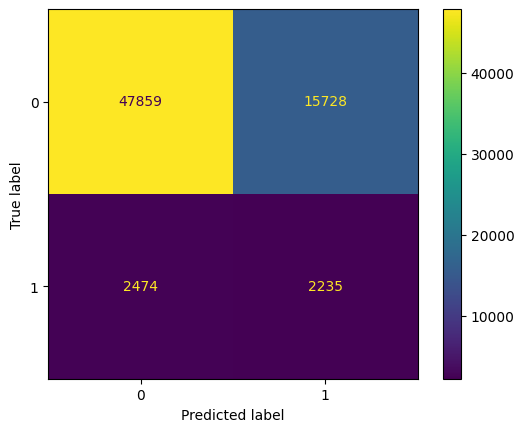

In [16]:
print(f"accuracy: {accuracy_score(y_test, y_pred_2)}")
print(f"f1: {f1_score(y_test, y_pred_2)}")
print(f"precision: {precision_score(y_test, y_pred_2)}")
print(f"recall: {recall_score(y_test, y_pred_2)}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_2)).plot()

## take 3

In [17]:
print(parameters_2)
print(grid_brfc_2.best_params_)

{'n_estimators': [190, 200, 210, 300], 'max_depth': [19, 20, 21, 30], 'min_samples_leaf': [2, 3], 'min_samples_split': [4, 5, 6]}
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 300}


In [18]:
brfc_3 = BalancedRandomForestClassifier(random_state=1, min_samples_leaf = 2, bootstrap = False, max_depth=20)
parameters_3 = {'n_estimators': [300, 400], 'min_samples_split': [6, 7, 10]}
grid_brfc_3 = GridSearchCV(brfc_3, parameters_3, scoring = 'f1')
grid_brfc_3.fit(X_train, y_train)

GridSearchCV(estimator=BalancedRandomForestClassifier(max_depth=20,
                                                      min_samples_leaf=2,
                                                      random_state=1),
             param_grid={'min_samples_split': [6, 7, 10],
                         'n_estimators': [300, 400]},
             scoring='f1')

In [19]:
print(grid_brfc_3.best_params_)
print(grid_brfc_3.best_score_)

{'min_samples_split': 10, 'n_estimators': 400}
0.19373795188394088


In [20]:
y_pred_3 = grid_brfc_3.best_estimator_.predict(X_test)

accuracy: 0.724713013939323
f1: 0.19588554809460673
precision: 0.12264353041988003
recall: 0.48630282437884903


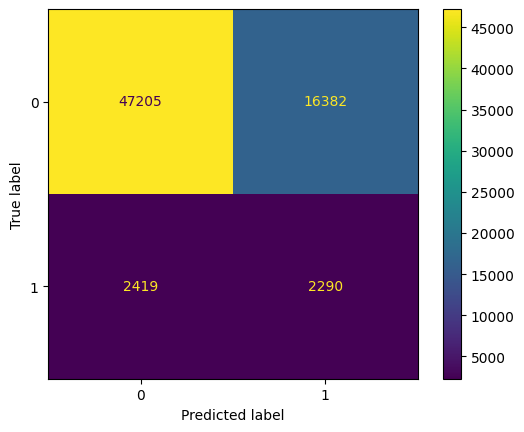

In [21]:
print(f"accuracy: {accuracy_score(y_test, y_pred_3)}")
print(f"f1: {f1_score(y_test, y_pred_3)}")
print(f"precision: {precision_score(y_test, y_pred_3)}")
print(f"recall: {recall_score(y_test, y_pred_3)}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_3)).plot()

## take 4

In [23]:
print(parameters_3)
print(grid_brfc_3.best_params_)

{'n_estimators': [300, 400], 'min_samples_split': [6, 7, 10]}
{'min_samples_split': 10, 'n_estimators': 400}


In [24]:
brfc_4 = BalancedRandomForestClassifier(random_state=1, min_samples_leaf = 1, min_samples_split = 2, bootstrap = False, max_depth=20)
parameters_4 = {'n_estimators': [400, 500], 'min_samples_split': [10, 15]}
grid_brfc_4 = GridSearchCV(brfc_4, parameters_4, scoring = 'f1')
grid_brfc_4.fit(X_train, y_train)

GridSearchCV(estimator=BalancedRandomForestClassifier(max_depth=20,
                                                      random_state=1),
             param_grid={'min_samples_split': [10, 15],
                         'n_estimators': [400, 500]},
             scoring='f1')

In [25]:
print(grid_brfc_4.best_params_)
print(grid_brfc_4.best_score_)

{'min_samples_split': 10, 'n_estimators': 500}
0.19369057506086046


In [26]:
y_pred_4 = grid_brfc_4.best_estimator_.predict(X_test)

accuracy: 0.7300866815040412
f1: 0.19558387153080817
precision: 0.12308452792881859
recall: 0.4758972180930134


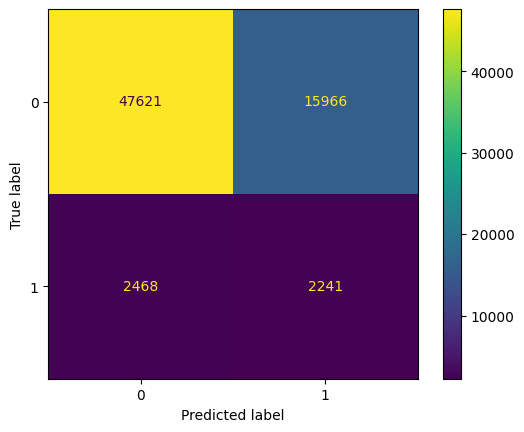

In [27]:
print(f"accuracy: {accuracy_score(y_test, y_pred_4)}")
print(f"f1: {f1_score(y_test, y_pred_4)}")
print(f"precision: {precision_score(y_test, y_pred_4)}")
print(f"recall: {recall_score(y_test, y_pred_4)}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_4)).plot()

## take 5

In [29]:
print(parameters_4)
print(grid_brfc_4.best_params_)

{'n_estimators': [400, 500], 'min_samples_split': [10, 15]}
{'min_samples_split': 10, 'n_estimators': 500}


In [31]:
brfc_5 = BalancedRandomForestClassifier(random_state=1, min_samples_leaf = 1, min_samples_split = 2, bootstrap = False, max_depth=20)
parameters_5 = {'n_estimators': [500, 800], 'min_samples_split': [10, 11]}
grid_brfc_5 = GridSearchCV(brfc_5, parameters_5, scoring = 'f1')
grid_brfc_5.fit(X_train, y_train)

GridSearchCV(estimator=BalancedRandomForestClassifier(max_depth=20,
                                                      random_state=1),
             param_grid={'min_samples_split': [10, 11],
                         'n_estimators': [500, 800]},
             scoring='f1')

In [32]:
print(grid_brfc_5.best_params_)
print(grid_brfc_5.best_score_)

{'min_samples_split': 10, 'n_estimators': 800}
0.1940421027447129


In [33]:
y_pred_5 = grid_brfc_5.best_estimator_.predict(X_test)

accuracy: 0.7310237788450276
f1: 0.19641294838145232
precision: 0.12368464547407856
recall: 0.4767466553408367


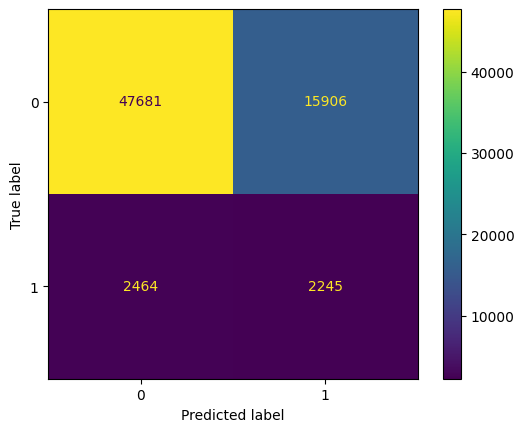

In [34]:
print(f"accuracy: {accuracy_score(y_test, y_pred_5)}")
print(f"f1: {f1_score(y_test, y_pred_5)}")
print(f"precision: {precision_score(y_test, y_pred_5)}")
print(f"recall: {recall_score(y_test, y_pred_5)}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_5)).plot()

## take 6

In [9]:
brfc_6 = BalancedRandomForestClassifier(random_state=1, min_samples_leaf = 1, min_samples_split = 2, bootstrap = False, max_depth=20)
parameters_6 = {'n_estimators': [800, 1000], 'min_samples_split': [9, 10]}
grid_brfc_6 = GridSearchCV(brfc_6, parameters_6, scoring = 'f1')
grid_brfc_6.fit(X_train, y_train)

GridSearchCV(estimator=BalancedRandomForestClassifier(max_depth=20,
                                                      random_state=1),
             param_grid={'min_samples_split': [9, 10],
                         'n_estimators': [800, 1000]},
             scoring='f1')

In [10]:
print(grid_brfc_6.best_params_)
print(grid_brfc_6.best_score_)

{'min_samples_split': 10, 'n_estimators': 1000}
0.19435429728473247


In [11]:
y_pred_6 = grid_brfc_6.best_estimator_.predict(X_test)

accuracy: 0.7246837296474171
f1: 0.19123403157125038
precision: 0.11990291262135923
recall: 0.47207475047780845


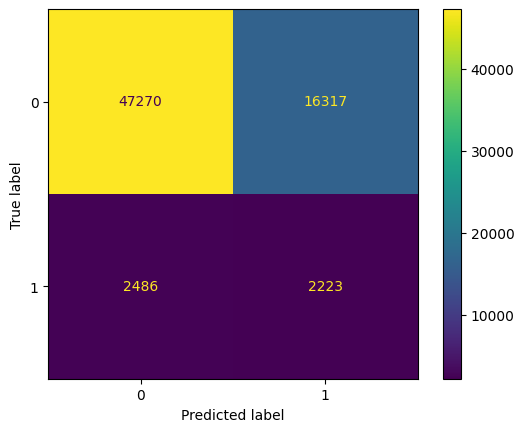

In [12]:
print(f"accuracy: {accuracy_score(y_test, y_pred_6)}")
print(f"f1: {f1_score(y_test, y_pred_6)}")
print(f"precision: {precision_score(y_test, y_pred_6)}")
print(f"recall: {recall_score(y_test, y_pred_6)}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_6)).plot()

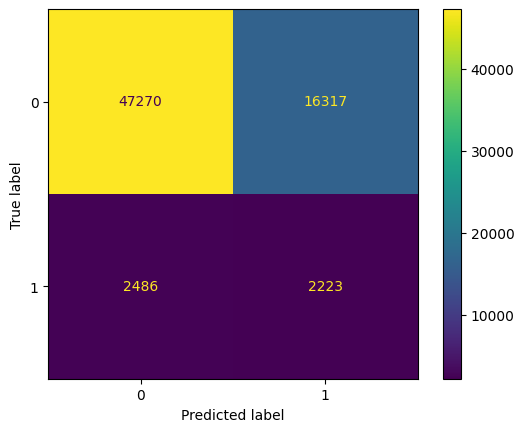

In [22]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_6)).plot()
plt.savefig('plots/brfc_confusion_matrix.pdf')

In [19]:
#with open('best_brfc.pickle', 'wb') as f:
#    f.write(pickle.dumps(grid_brfc_6.best_estimator_))

In [20]:
#my_model = pickle.loads(open('best_brfc.pickle', 'rb').read())

In [21]:
my_model

BalancedRandomForestClassifier(max_depth=20, min_samples_split=9,
                               n_estimators=800, random_state=1)

# scaling and PCA

In [13]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

pca = PCA(n_components=7)
pca.fit(scaler.fit_transform(X_train))

PCA(n_components=7)

In [14]:
tot = sum(pca.singular_values_)
j=0
for i in pca.singular_values_:
    j+=i
    print(j/tot)

0.22006708372212888
0.40680500841786127
0.565475823504395
0.7204369789759479
0.8738581666854344
0.9908115084673488
1.0


In [15]:
pca.singular_values_

array([639.59584261, 542.72905458, 461.15571651, 450.37408198,
       445.89836957, 339.90940361,  26.70513411])

Text(0.5, 0, 'principal component')

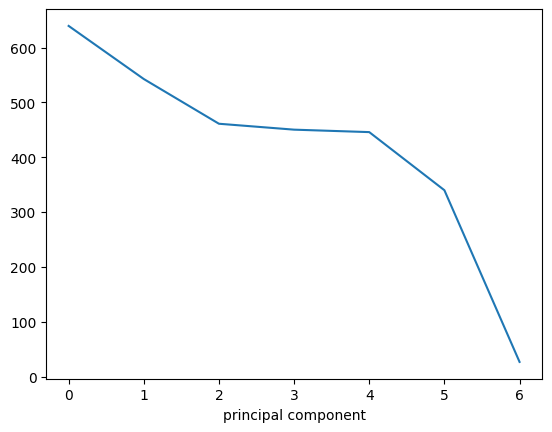

In [23]:
plt.plot(pca.singular_values_)
plt.xlabel('principal component')

In [17]:
scaler = StandardScaler()

pca = PCA(n_components = 7)
pca.fit(scaler.fit_transform(X_train))

PCA(n_components=7)

In [18]:
pipe = Pipeline([('normalize', scaler), ('PCA', pca), ('svm', SVC())])

In [19]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('normalize', StandardScaler()), ('PCA', PCA(n_components=7)),
                ('svm', SVC())])

In [20]:
y_pred = pipe.predict(X_test)

accuracy: 0.9310501347077428
f1: 0.0
precision: 0.0
recall: 0.0


/home/peter/.venvs/MyEnv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


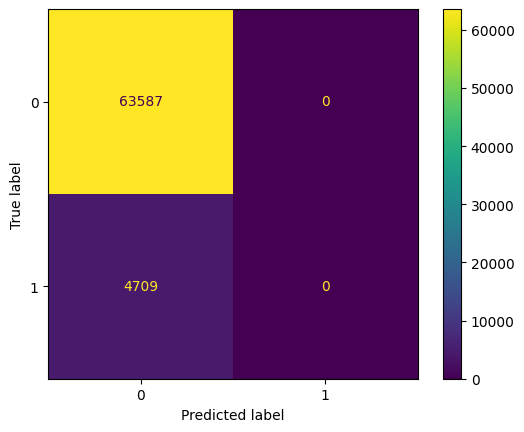

In [21]:
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()